# Comparison MDA vs KMeans

In [ ]:
import numpy as np
import pandas as pd
from bluemath_tk.datamining.mda import MDA
from bluemath_tk.datamining.kma import KMA
from bluemath_tk.datamining.lhs import LHS

from utils.plotting import plot_variable_combinations

## Generate Dataset

### Generate random set of data

In [2]:
data = pd.DataFrame(
    {
        'Hs': np.random.rand(1000) * 7,
        'Tp': np.random.rand(1000) * 20,
        'Dir': np.random.rand(1000) * 360
    }
)

### Generate set of data from LHS

In [3]:
dimensions_names = ['Hs', 'Tp', 'Dir']
lower_bounds = [0, 3, 0]
upper_bounds = [7, 20, 360]
num_samples = 1000

lhs = LHS(num_dimensions=len(dimensions_names), seed=0)
data = lhs.generate(
    dimensions_names=dimensions_names,
    lower_bounds=lower_bounds,
    upper_bounds=upper_bounds,
    num_samples=num_samples,
)
data

2025-04-02 10:28:14,793 - LHS - WARNING - Setting self.num_workers to 1. Change it using self.set_num_processors_to_use method.


,Hs,Tp,Dir
0,5.511541,17.343414,231.825250
1,5.732884,6.233174,32.791408
2,4.307754,5.027599,26.444295
3,0.903454,9.463130,221.039014
4,0.483998,15.545429,202.057324
...,...,...,...
995,6.867241,12.195831,341.955403
996,3.444233,6.485844,354.479253
997,2.211280,5.080653,9.562285
998,0.392336,5.479818,123.199842


In [4]:
num_centers = 100
dir_vars = ['Dir']

mda = MDA(num_centers=num_centers)
nearest_centroids_idxs, nearest_centroids_df = mda.fit_predict(
    data=data,
    directional_variables=dir_vars,
)

2025-04-02 10:28:18,520 - MDA - WARNING - Setting self.num_workers to 1. Change it using self.set_num_processors_to_use method.


/workspaces/BlueMath/toolkit/datamining/utils/plotting.py:39: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(v1, v2, c=data_color, s=size_point, cmap  = 'rainbow', alpha=0.2)


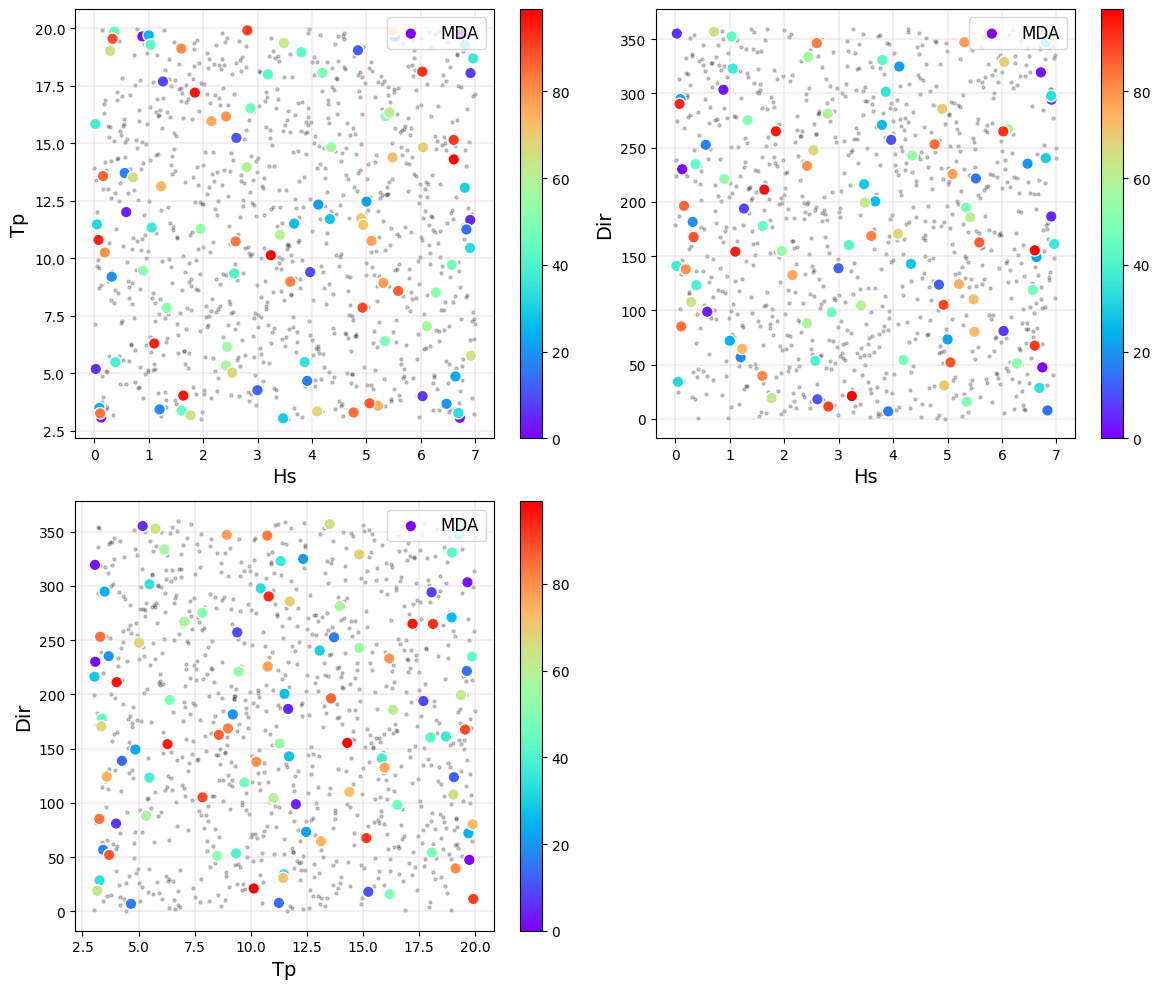

In [5]:
vars = ['Hs', 'Tp', 'Dir']  # Lista de variables
sel_mda = mda.centroids[vars]  # Selección de puntos
plot_variable_combinations(mda.data, vars, mda.centroids, labels = 'MDA')

## KMA

In [6]:
num_centers = 50
dir_vars = ['Dir']

kma = KMA(num_clusters=num_centers)
nearest_centroids_idxs, nearest_centroids_df = kma.fit_predict(
    data=data,
    directional_variables=dir_vars,
)

2025-04-02 10:28:21,457 - KMA - WARNING - Setting self.num_workers to 1. Change it using self.set_num_processors_to_use method.


/workspaces/BlueMath/toolkit/datamining/utils/plotting.py:39: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(v1, v2, c=data_color, s=size_point, cmap  = 'rainbow', alpha=0.2)


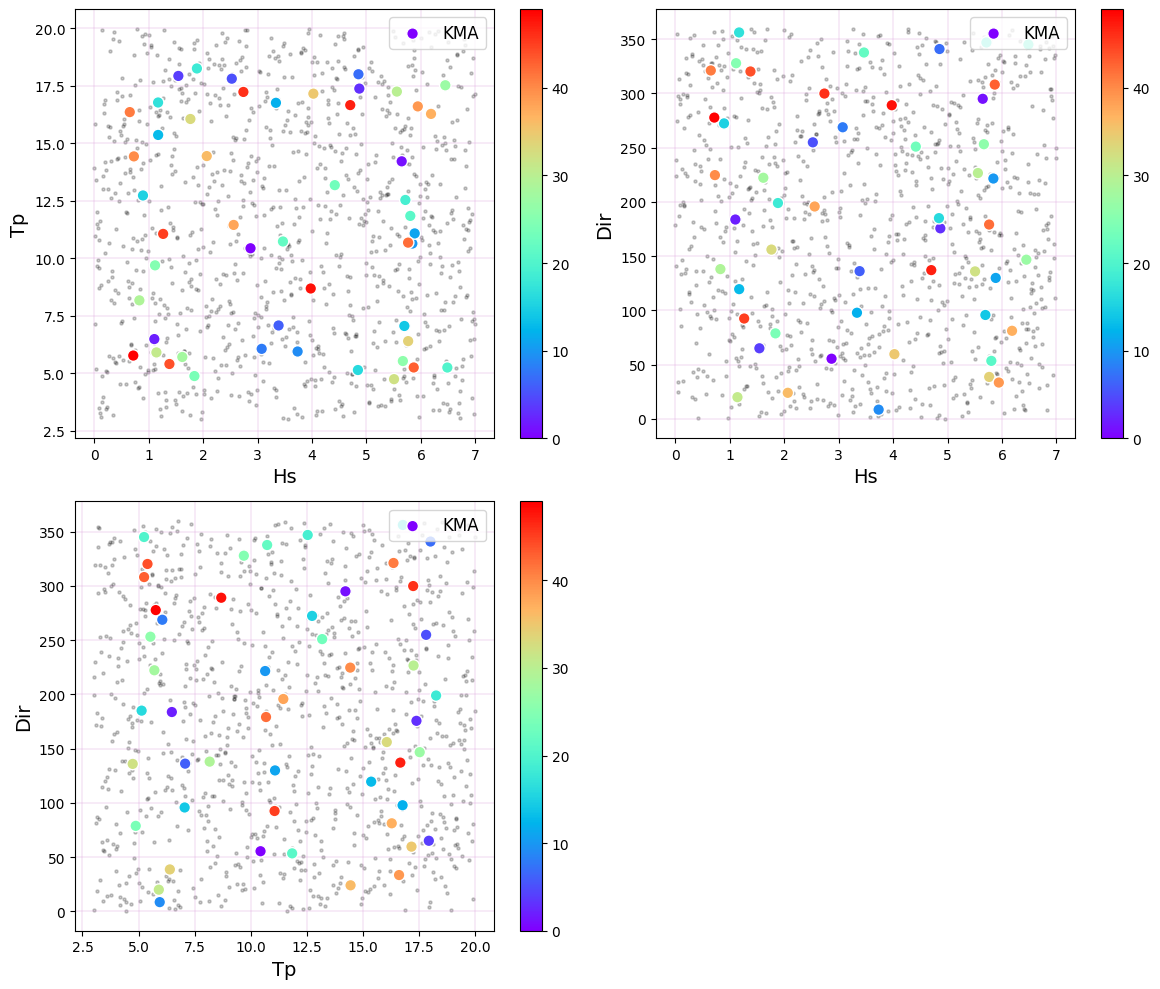

In [7]:
vars = ['Hs', 'Tp', 'Dir']  # Lista de variables
plot_variable_combinations(kma.data, vars, kma.centroids, labels = 'KMA')

## Compare MDA vs KMA

/workspaces/BlueMath/toolkit/datamining/utils/plotting.py:39: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(v1, v2, c=data_color, s=size_point, cmap  = 'rainbow', alpha=0.2)


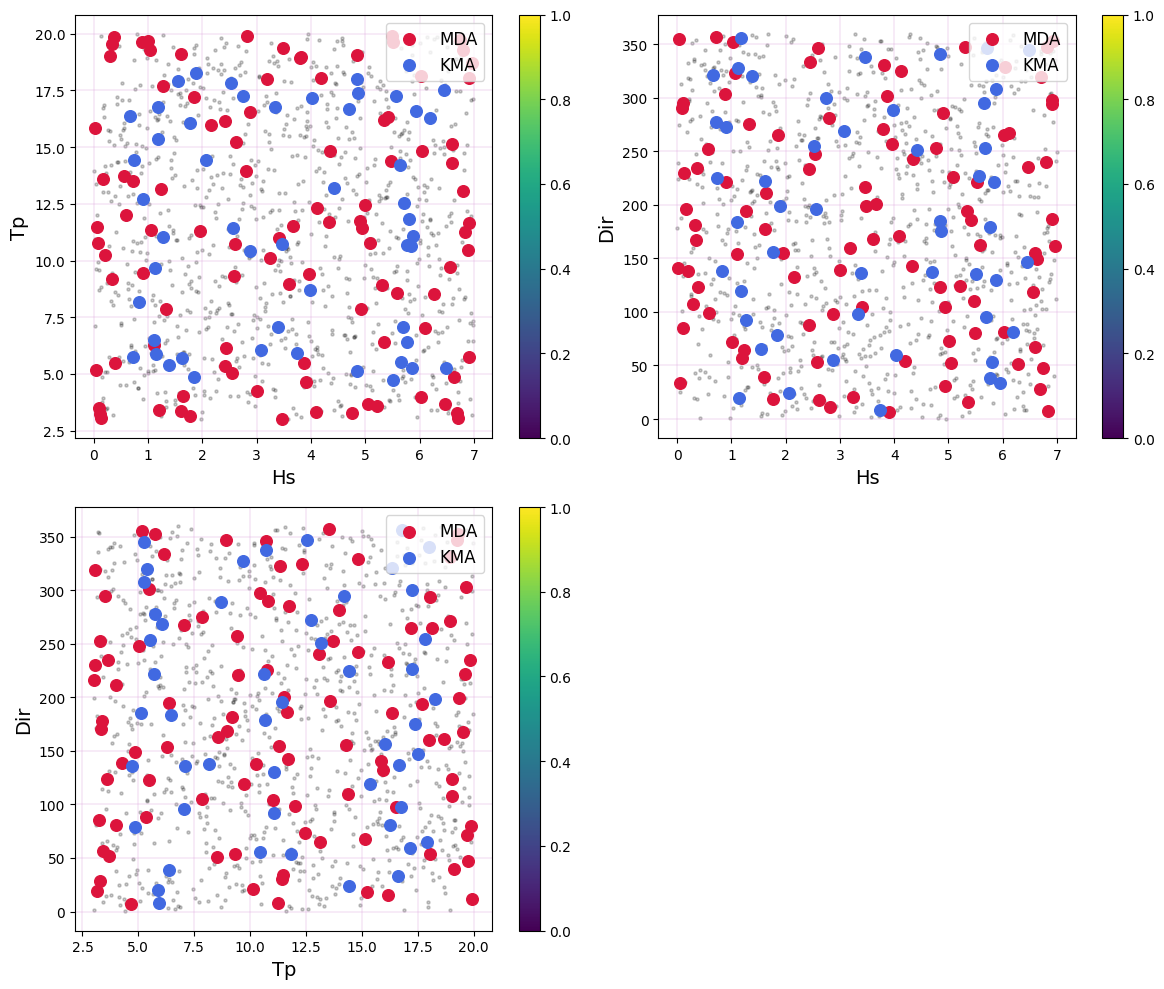

In [8]:
vars = ['Hs', 'Tp', 'Dir']  # Lista de variables
sel_mda = mda.centroids[vars]  # Selección de puntos
plot_variable_combinations(mda.data, vars, [mda.centroids, kma.centroids], labels = ['MDA', 'KMA'])

### Predict the cluster for a given value using MDA and KMeans

In [9]:
# Generate a sample data to predict:

data_pred = pd.DataFrame(
    {
        'Hs': [4, 2, 6],
        'Tp': [12, 10, 15],
        'Dir': [90, 350, 280]
    }
)

### Using MDA

In [13]:
print('\nInput data to predict:')
print(data_pred)

print('\nPredicted Cluster:')
print(mda.centroids.iloc[mda.predict(data_pred)[0]])

2025-04-02 10:28:57,040 - MDA - WARNING - Proposed max custom scaler for Dir_u is lower than datapoint



Input data to predict:
   Hs  Tp  Dir
0   4  12   90
1   2  10  350
2   6  15  280

Predicted Cluster:
          Hs         Tp     Dir_u     Dir_v         Dir
60  3.412020  11.014982  0.968743 -0.248068  104.363218
83  2.599982  10.733123 -0.238081  0.971245  346.226684
93  6.023774  18.120727 -0.995972 -0.089663  264.855761


### Using KMeans

In [12]:
print('\nInput data to predict:')
print(data_pred)

print('\nPredicted Cluster:')
print(kma.centroids.iloc[kma.predict(data_pred)[0].kma_bmus.values])

2025-04-02 10:28:54,407 - KMA - WARNING - Proposed max custom scaler for Dir_u is lower than datapoint



Input data to predict:
   Hs  Tp  Dir
0   4  12   90
1   2  10  350
2   6  15  280

Predicted Cluster:
          Hs         Tp     Dir_u     Dir_v         Dir
12  3.338310  16.763344  0.972133 -0.132007   97.732957
25  1.119669   9.689851 -0.513793  0.813626  327.728191
1   5.646073  14.216958 -0.880388  0.409290  294.933598
